<a href="https://colab.research.google.com/github/Benard-W/-Performance-Analysis/blob/main/Aflatoxin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [141]:
df = pd.read_csv('/content/aflatoxin_detection_simulated.csv')
df = df.drop(columns=["Sample_ID"])

In [142]:
df.head()

,Moisture_Content(%),Temperature(°C),Humidity(%),Fungal_Infection_Level(%),Storage_Duration(days),Aflatoxin_Level(ppb),Aflatoxin_Detected
0,12.99,23.8,73.6,28.2,21,13.05,No
1,11.72,26.7,75.6,17.7,233,29.20,Yes
2,13.30,27.0,80.8,75.1,281,19.61,No
3,15.05,25.6,80.5,80.7,165,20.86,Yes
4,11.53,27.5,56.2,99.1,17,0.00,No


In [143]:
# List of features to visualize
features_to_plot = [
    "Moisture_Content(%)",
    "Temperature(°C)",
    "Humidity(%)",
    "Fungal_Infection_Level(%)",
    "Storage_Duration(days)",
    "Aflatoxin_Level(ppb)"
]

In [144]:
# Encode target variable
le = LabelEncoder()
df['Aflatoxin_Detected'] = le.fit_transform(df['Aflatoxin_Detected'])

In [145]:
# Separate features and target
X = df.drop(columns=["Aflatoxin_Detected"])
y = df["Aflatoxin_Detected"]

In [146]:

# Split dataset first (so we don't oversample the test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [147]:
# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [148]:
# Display class distribution before and after
print("Original training set class distribution:")
print(y_train.value_counts())
print("\nBalanced training set class distribution:")
print(pd.Series(y_train_bal).value_counts())

Original training set class distribution:
Aflatoxin_Detected
0    54
1    26
Name: count, dtype: int64

Balanced training set class distribution:
Aflatoxin_Detected
0    54
1    54
Name: count, dtype: int64


In [149]:
from collections import Counter
print(Counter(y_train_bal))  # Expect near-equal counts for 0 and 1


Counter({0: 54, 1: 54})


In [150]:
df['Aflatoxin_Detected'] = (df['Aflatoxin_Level(ppb)'] > 10).astype(int)  # Kenya standard


In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



In [152]:
df['Aflatoxin_Detected'].value_counts()


,count
Aflatoxin_Detected,
1,71
0,29


In [153]:
# from imblearn.over_sampling import SMOTE # Redundant import

# smote = SMOTE(random_state=42) # Redundant instantiation
# X_bal, y_bal = smote.fit_resample(X, y) # This line caused the error because X contained NaNs

# print(pd.Series(y_bal).value_counts())  # Check balance

In [154]:
# Convert categorical target to numeric for correlation heatmap
df['Aflatoxin_Detected_Num'] = df['Aflatoxin_Detected'].map({'No': 0, 'Yes': 1})

In [155]:

# Encode target
le = LabelEncoder()
df['Aflatoxin_Detected'] = le.fit_transform(df['Aflatoxin_Detected'])  # No=0, Yes=1

In [156]:
# Separate features and target
X = df.drop(columns=["Aflatoxin_Detected"])
y = df["Aflatoxin_Detected"]

# Split dataset first (so we don't oversample the test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Impute missing values in the training set before applying SMOTE
# Use the mean strategy for numerical features
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
# Note: While the error occurs on the training set, it's good practice to impute the test set
# using the imputer fitted on the training set to maintain consistency.
X_test_imputed = imputer.transform(X_test)


# Apply SMOTE to the imputed training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_imputed, y_train)

# Display class distribution before and after
print("Original training set class distribution:")
print(y_train.value_counts())
print("\nBalanced training set class distribution:")
print(pd.Series(y_train_bal).value_counts())

Original training set class distribution:
Aflatoxin_Detected
1    57
0    23
Name: count, dtype: int64

Balanced training set class distribution:
Aflatoxin_Detected
0    57
1    57
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Aflatoxin_Detected_Num']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Aflatoxin_Detected_Num']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [157]:
# Recombine for visualization
# Use the columns from the original training set features (before imputation and SMOTE)
# as they should align with the columns in X_train_bal

# Drop the 'Aflatoxin_Detected_Num' column from X_train.columns before using it
# This column was added for visualization and is not part of the features used for model training/balancing
columns_for_df_bal = X_train.columns.drop('Aflatoxin_Detected_Num', errors='ignore')

# Use the filtered columns to create the DataFrame
df_bal = pd.DataFrame(X_train_bal, columns=columns_for_df_bal)
df_bal['Aflatoxin_Detected'] = y_train_bal

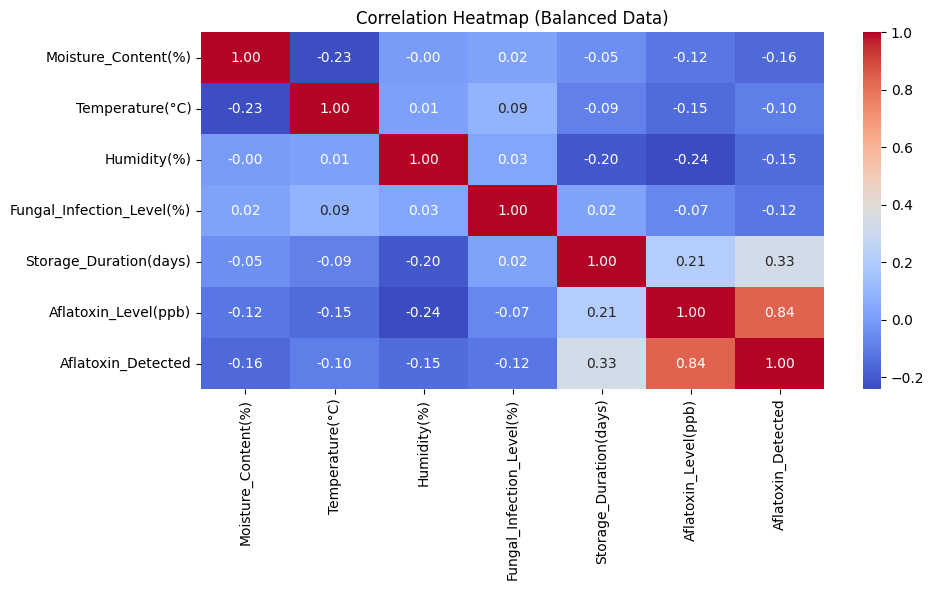

In [158]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_bal.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Balanced Data)")
plt.tight_layout()
plt.show()

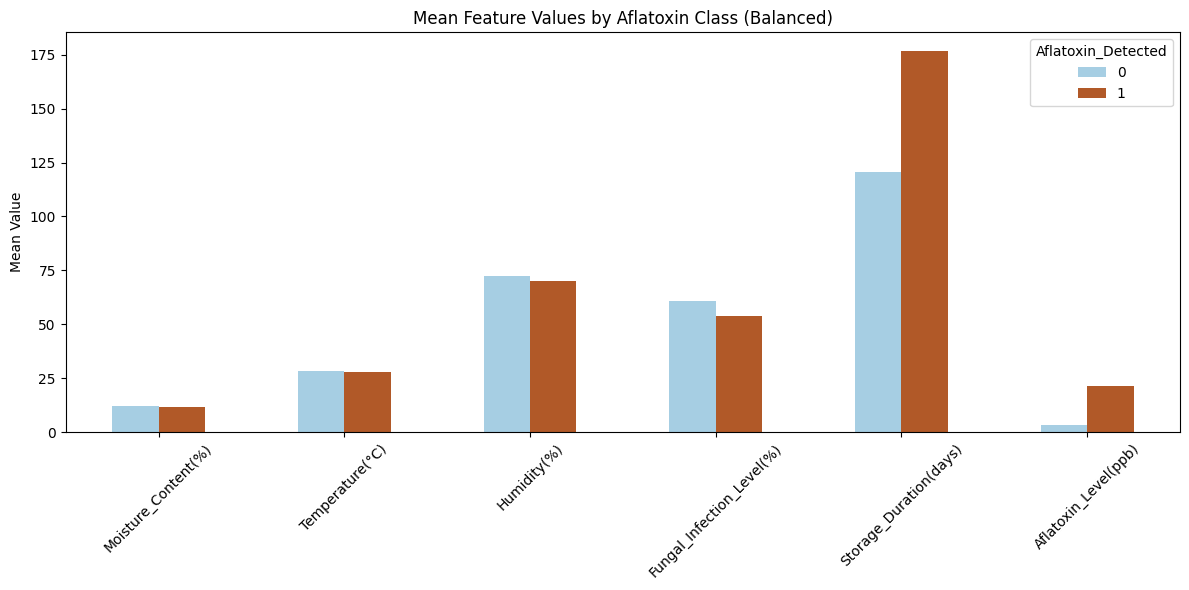

In [159]:
# Select all columns from df_bal except the target column 'Aflatoxin_Detected'
feature_columns_in_df_bal = df_bal.columns.drop("Aflatoxin_Detected")

# Calculate mean values using the columns present in df_bal
mean_vals_bal = df_bal.groupby("Aflatoxin_Detected")[feature_columns_in_df_bal].mean().T

mean_vals_bal.plot(kind="bar", figsize=(12, 6), colormap="Paired")
plt.title("Mean Feature Values by Aflatoxin Class (Balanced)")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-160-3d71eb03a8f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aflatoxin_Detected', data=df_bal, palette='Set2')


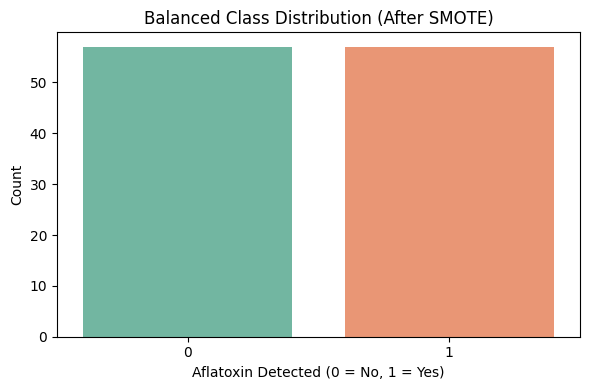

In [160]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Aflatoxin_Detected', data=df_bal, palette='Set2')
plt.title("Balanced Class Distribution (After SMOTE)")
plt.xlabel("Aflatoxin Detected (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [162]:
# Impute missing values in the training set before applying SMOTE
# Use the mean strategy for numerical features
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Apply SMOTE to the imputed training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_imputed, y_train)

# Display class distribution before and after
print("Original training set class distribution:")
print(y_train.value_counts())
print("\nBalanced training set class distribution:")
print(pd.Series(y_train_bal).value_counts())

Original training set class distribution:
Aflatoxin_Detected
1    57
0    23
Name: count, dtype: int64

Balanced training set class distribution:
Aflatoxin_Detected
0    57
1    57
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Aflatoxin_Detected_Num']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [163]:
# Drop irrelevant columns BEFORE training
# df = df.drop(columns=["Sample_ID"])  # This line is redundant and causes the error as Sample_ID has already been dropped.
X = df.drop(columns=["Aflatoxin_Detected"])  # should give you 5 features

In [164]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [165]:

# Predict on the imputed test set (which also has 6 features)
y_pred = model.predict(X_test_imputed) # Predict on the imputed test data

In [166]:
print(X_train_bal.shape)  # should return (n_samples, 6) if 6 features
print(X_train_bal.columns if hasattr(X_train_bal, "columns") else "Check source")  # feature names


(114, 6)
Check source


In [167]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Aflatoxin', 'Aflatoxin Detected']))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                     precision    recall  f1-score   support

      No Aflatoxin       1.00      0.83      0.91         6
Aflatoxin Detected       0.93      1.00      0.97        14

          accuracy                           0.95        20
         macro avg       0.97      0.92      0.94        20
      weighted avg       0.95      0.95      0.95        20

Accuracy: 0.95
Confusion Matrix:
 [[ 5  1]
 [ 0 14]]


In [168]:
import joblib

# Save the trained model
joblib.dump(model, "aflatoxin_rf_model.pkl")

print("Model saved successfully as 'aflatoxin_rf_model.pkl'")


Model saved successfully as 'aflatoxin_rf_model.pkl'


In [169]:

!pip install streamlit pyngrok

In [170]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the saved Aflatoxin Detection model
model = joblib.load("aflatoxin_rf_model.pkl")

st.set_page_config(page_title="Aflatoxin Detection App", layout="centered")
st.title("🌽 Aflatoxin Detection Model")

st.markdown("Enter sample features to predict the likelihood of aflatoxin contamination.")

# Sample inputs for the 6 features used in training
moisture_content = st.slider("Moisture Content (%)", 5.0, 20.0, 12.5)
temperature = st.slider("Temperature (°C)", 15.0, 40.0, 25.0)
humidity = st.slider("Humidity (%)", 30.0, 90.0, 60.0)
storage_days = st.slider("Storage Days", 0, 180, 30)
fungal_count = st.slider("Fungal Count (CFU/g)", 0, 1000, 250)
# Add the sixth feature input - assuming it is Aflatoxin_Level(ppb)
# Note: Using Aflatoxin_Level as an input to predict Aflatoxin_Detected might be conceptually problematic
# as Aflatoxin_Level is a direct measure related to the presence of aflatoxin.
# If Aflatoxin_Level was truly a feature used for training to predict 'Detected' (binary),
# this input is needed. If not, you need to re-evaluate your feature set.
# Assuming it was part of the training features based on your correlation heatmap creation.
aflatoxin_level = st.slider("Aflatoxin Level (ppb)", 0.0, 50.0, 5.0)


# Predict button
if st.button("Predict Aflatoxin Risk"):
    # Combine input features into a NumPy array
    # Ensure the order of features matches the training data
    input_data = np.array([[moisture_content, temperature, humidity, storage_days, fungal_count, aflatoxin_level]])

    # Impute missing values in the input data using the imputer fitted on the training data
    # You need to save the imputer as well, or refit it here (less ideal)
    # A better approach would be to include the imputer in a pipeline and save the pipeline.
    # For a quick fix, let's assume you refit it here (not recommended for production) or load a saved imputer.
    # Since we don't have the saved imputer, this part needs adjustment.
    # A simpler approach for this specific case (mean imputation on numerical data) is to apply the mean directly
    # if you know the mean of each training column.
    # A robust solution involves saving and loading the imputer or the entire pipeline.

    # **** Simplified approach: Assuming input features don't have NaNs here. ****
    # **** If your real application data might have NaNs, you MUST handle imputation here. ****
    # **** For a proper solution, consider saving the imputer fitted on X_train_imputed and loading it here. ****
    # Example of loading and using a saved imputer (assuming you saved it as 'imputer.pkl')
    # try:
    #     loaded_imputer = joblib.load("imputer.pkl")
    #     input_data_imputed = loaded_imputer.transform(input_data)
    # except FileNotFoundError:
    #     st.error("Imputer not found. Cannot process input data.")
    #     input_data_imputed = None # Prevent prediction

    # If not using a loaded imputer and assuming no NaNs in input:
    input_data_imputed = input_data # Proceed with prediction

    if input_data_imputed is not None:
        prediction = model.predict(input_data_imputed)[0]
        label = "Detected ✅" if prediction == 1 else "Not Detected ❌"

        # Output
        st.success(f"🔬 Aflatoxin Status: **{label}**")

Overwriting app.py


In [173]:
from google.colab import files
uploaded = files.upload()


Saving aflatoxin_rf_model (1).pkl to aflatoxin_rf_model (1) (1).pkl


In [ ]:
!ngrok authtoken 2vl8xQXPu1pGsk6VPCb17CbSAdP_3pNdjReMEbzMurzudF5SD
from pyngrok import ngrok
import os
import time
sleep = time.sleep(5)


!pkill streamlit

# Create a tunnel to the default Streamlit port (8501)
public_url = ngrok.connect(addr=8501)
print("🌐 Streamlit app is live at:", public_url)

# Run the Streamlit app
!streamlit run app.py &
sleep.time(5)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Streamlit app is live at: NgrokTunnel: "https://5e34-35-232-247-248.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.232.247.248:8501

